<a href="https://colab.research.google.com/github/sameer786999/RMF-analysis/blob/main/RMF_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sameer786999/RMF-analysis.git

Cloning into 'RMF-analysis'...


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Data.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 227179: invalid start byte

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df["Country"].value_counts()

Country
United Kingdom     24560
Germany              309
France               287
EIRE                 228
Norway               147
Portugal              94
Japan                 65
Spain                 45
Lithuania             35
Iceland               31
Italy                 25
Australia             22
Denmark               20
Channel Islands       17
Belgium               12
Poland                 8
Switzerland            6
Netherlands            2
Name: count, dtype: int64

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
total                 float64
dtype: object

In [ ]:
# Convert to string first if needed
df['UnitPrice'] = df['UnitPrice'].astype(str)

# Replace commas with dots
df['UnitPrice'] = df['UnitPrice'].str.replace(",", ".")

# Convert to float
df['UnitPrice'] = df['UnitPrice'].astype("float64")


In [ ]:

df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25909,538419,84978,HANGING HEART JAR T-LIGHT HOLDER,6,12/12/10 12:01,1.25,16367.0,United Kingdom
25910,538419,22963,JAM JAR WITH GREEN LID,6,12/12/10 12:01,0.85,16367.0,United Kingdom
25911,538419,84763,ZINC FINISH 15CM PLANTER POTS,3,12/12/10 12:01,1.25,16367.0,United Kingdom
25912,538419,20977,36 PENCILS TUBE WOODLAND,1,12/12/10 12:01,1.25,16367.0,United Kingdom
25913,538419,21984,PACK OF 12 PINK PAISLEY TISSUES,2,12/12/10 12:01,0.29,16367.0,NaN


In [ ]:
#understanding/findin out each customers rec , freq and monetary values



#recenccy

day="2012-01-01"
day=pd.to_datetime(day)
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])



recency=df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})

<ipython-input-25-314d59fe6a37>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])


In [ ]:
recency.head(10)

,InvoiceDate
CustomerID,
12347.0,389
12386.0,388
12395.0,393
12427.0,393
12429.0,387
12431.0,395
12433.0,388
12441.0,388
12471.0,386


In [ ]:
#frequency


freq=df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12347.0,1
12386.0,1
12395.0,1
12427.0,1
12429.0,1


In [ ]:
#monetary



df["total"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12347.0,711.79
12386.0,258.90
12395.0,346.10
12427.0,303.50
12429.0,1281.50
...,...
18229.0,653.20
18230.0,-6.75
18239.0,438.10


In [ ]:
RFM=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,InvoiceDate,InvoiceNo,total
CustomerID,,,
12347.0,389,1,711.79
12386.0,388,1,258.90
12395.0,393,1,346.10
12427.0,393,1,303.50
12429.0,387,1,1281.50
...,...,...,...
18229.0,388,2,653.20
18230.0,387,1,-6.75
18239.0,394,1,438.10


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

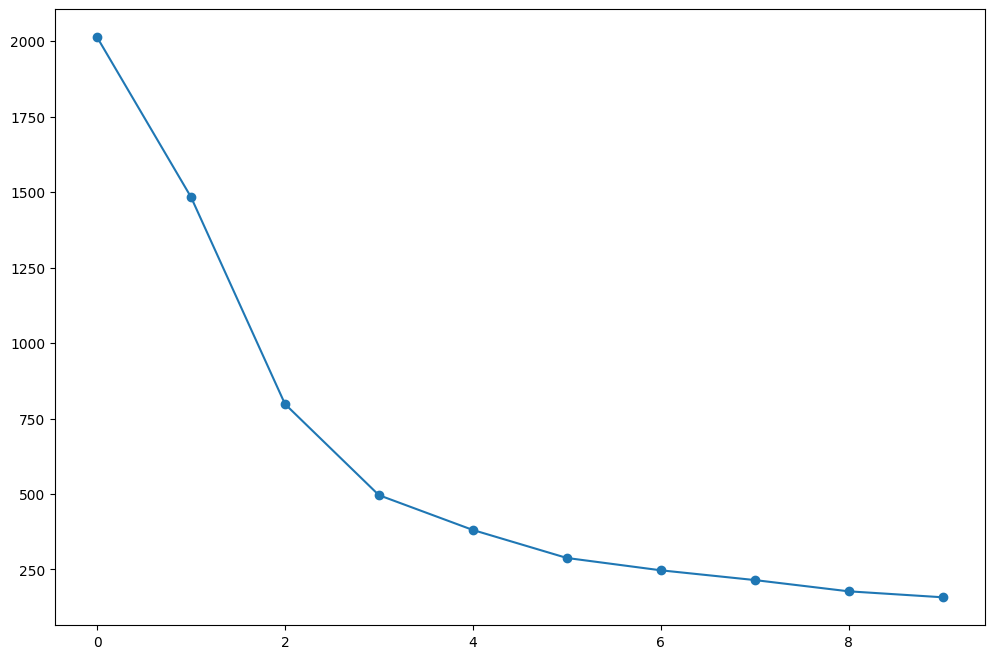

In [ ]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
RFM

,InvoiceDate,InvoiceNo,total,Clusters
CustomerID,,,,
12347.0,389,1,711.79,3
12386.0,388,1,258.90,3
12395.0,393,1,346.10,2
12427.0,393,1,303.50,2
12429.0,387,1,1281.50,3
...,...,...,...,...
18229.0,388,2,653.20,3
18230.0,387,1,-6.75,3
18239.0,394,1,438.10,2


In [ ]:


# Assuming RFM is already defined and contains the relevant data
# Group by the "Clusters" column and calculate the mean for the specified columns
final = RFM.groupby("Clusters")[["InvoiceDate", "InvoiceNo", "total"]].mean()

# Display the result
print(final)


          InvoiceDate  InvoiceNo         total
Clusters                                      
1          387.666667  15.333333  11057.795000
2          393.430328   1.168033    355.815205
3          387.800475   1.482185    454.736793


In [ ]:
def func(row):

    if row["Clusters"]==2:
        return 'Lapsed Cx'
    else:
        return 'Avg. Cx'

In [ ]:
RFM['group']=RFM.apply(func, axis=1)

In [ ]:
print(RFM.columns)

Index(['InvoiceDate', 'InvoiceNo', 'total', 'Clusters', 'group'], dtype='object')


In [ ]:
RFM

,InvoiceDate,InvoiceNo,total,Clusters,group
CustomerID,,,,,
12347.0,389,1,711.79,3,Avg. Cx
12386.0,388,1,258.90,3,Avg. Cx
12395.0,393,1,346.10,2,Lapsed Cx
12427.0,393,1,303.50,2,Lapsed Cx
12429.0,387,1,1281.50,3,Avg. Cx
...,...,...,...,...,...
18229.0,388,2,653.20,3,Avg. Cx
18230.0,387,1,-6.75,3,Avg. Cx
18239.0,394,1,438.10,2,Lapsed Cx


<Axes: ylabel='group'>

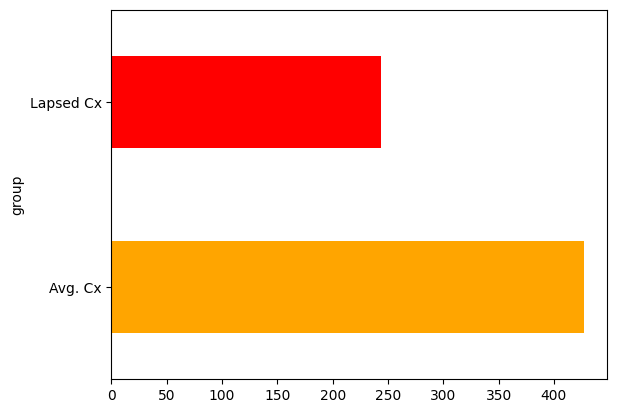

In [ ]:
result=RFM.group.value_counts()
result.plot(kind="barh", color=["Orange","Red","Green"])